# **Диагностическая работа по теме: "Генерация сигналов и ряды Фурье"**



## **Задание 1. Генерация и визуализация сигналов**


Напишите программу для генерации и визуализации следующих сигналов:
1. Синусоидальный сигнал с частотой 7 Гц и амплитудой 2
2. Сумма двух синусоид с частотами 3 Гц и 15 Гц, и амплитудами 1.5 и 0.8 соответственно
3. Прямоугольный сигнал с частотой 4 Гц
4. Пилообразный сигнал с частотой 6 Гц

Отобразите все сигналы на одном графике (используя subplot) для временного интервала 0-2 секунды с частотой дискретизации 500 Гц.

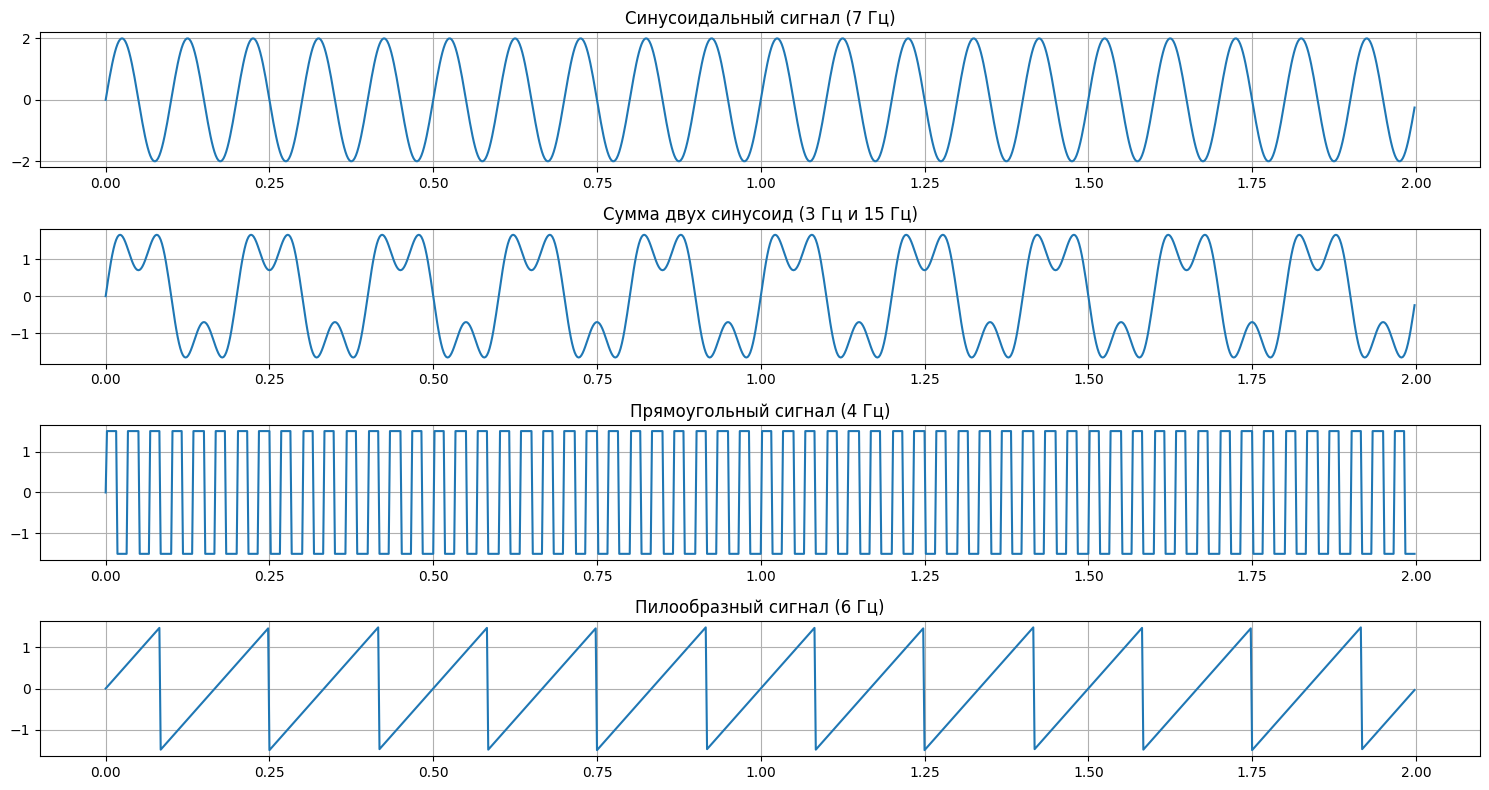

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fs = 500 
t = np.linspace(0, 2, 2 * fs, endpoint=False)  

s1 = 2 * np.sin(2 * np.pi * 10 * t)
s2 = 1.5 * np.sin(2 * np.pi * 5 * t) + 0.8 * np.sin(2 * np.pi * 15 * t)

s3 = 1.5 * np.sign(np.sin(2 * np.pi * 30 * t))

s4 = 1.5 * (2 * (t * 6 - np.floor(t * 6 + 0.5)))

plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.plot(t, s1)
plt.title("Синусоидальный сигнал (7 Гц)")
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(t, s2)
plt.title("Сумма двух синусоид (3 Гц и 15 Гц)")
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(t, s3)
plt.title("Прямоугольный сигнал (4 Гц)")
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(t, s4)
plt.title("Пилообразный сигнал (6 Гц)")
plt.grid()

plt.tight_layout()
plt.show()

## **Задание 2. Анализ частотного спектра**


Сгенерируйте сигнал, представляющий собой сумму трех синусоид с частотами 20 Гц, 45 Гц и 80 Гц и амплитудами 1, 0.7 и 0.5 соответственно. Добавьте к сигналу случайный шум с амплитудой 0.2. Выполните следующие действия:
1. Визуализируйте сигнал во временной области
2. Примените преобразование Фурье и визуализируйте спектр сигнала
3. Определите по спектру, какие частоты присутствуют в сигнале и с какой относительной мощностью

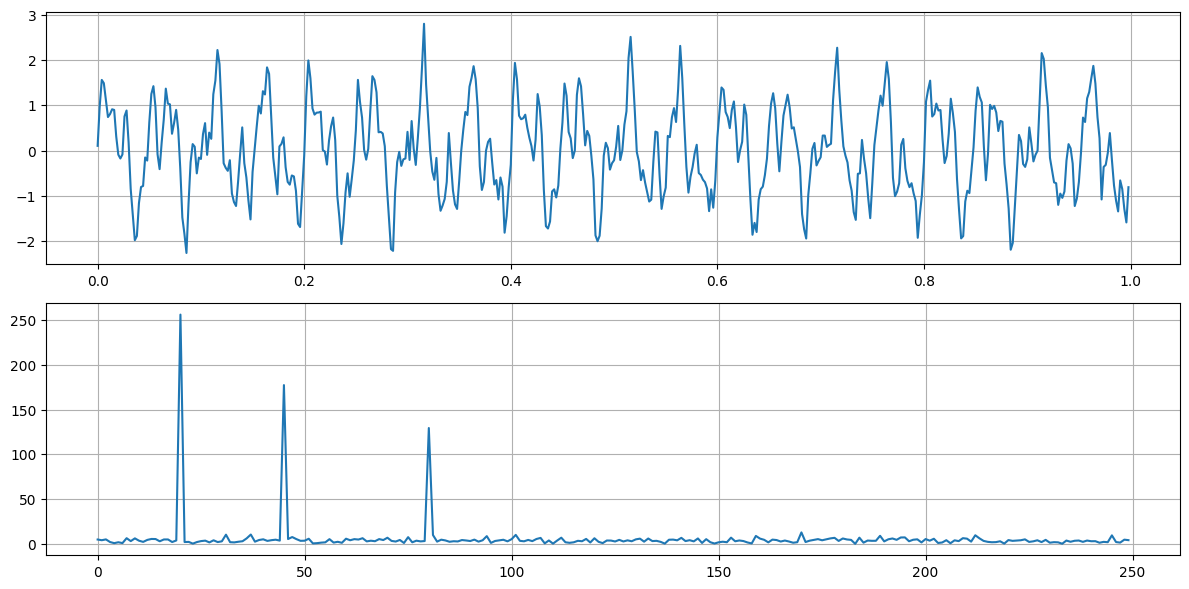

[20. 45. 80.]


In [33]:
from scipy.fftpack import fft, fftfreq

frequencies = [20, 45, 80] 
amplitudes = [1, 0.7, 0.5]  
noise_amplitude = 0.2  

t = np.linspace(0, 1, fs, endpoint=False)

signal = sum(A * np.sin(2 * np.pi * f * t) for A, f in zip(amplitudes, frequencies))
signal += noise_amplitude * np.random.randn(len(t))

fft_result = fft(signal)
freqs = fftfreq(len(signal), 1 / fs)
magnitude = np.abs(fft_result) / len(signal)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)

plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freqs[:fs // 2], np.abs(fft_result)[:fs // 2])
plt.grid()

plt.tight_layout()
plt.show()

res_freqs = freqs[:len(signal) // 2][magnitude[:len(signal) // 2] > 0.05]
print(res_freqs)

## **Задание 3. Фильтрация сигнала**


Создайте сигнал, состоящий из суммы низкочастотного (5 Гц) и высокочастотного (60 Гц) компонентов с добавлением случайного шума. Выполните следующие действия:
1. Реализуйте функцию для низкочастотной фильтрации, которая убирает частоты выше заданного порога
2. Примените ваш фильтр с частотой среза 15 Гц для выделения только низкочастотной составляющей
3. Визуализируйте исходный сигнал и результат фильтрации как во временной, так и в частотной областях

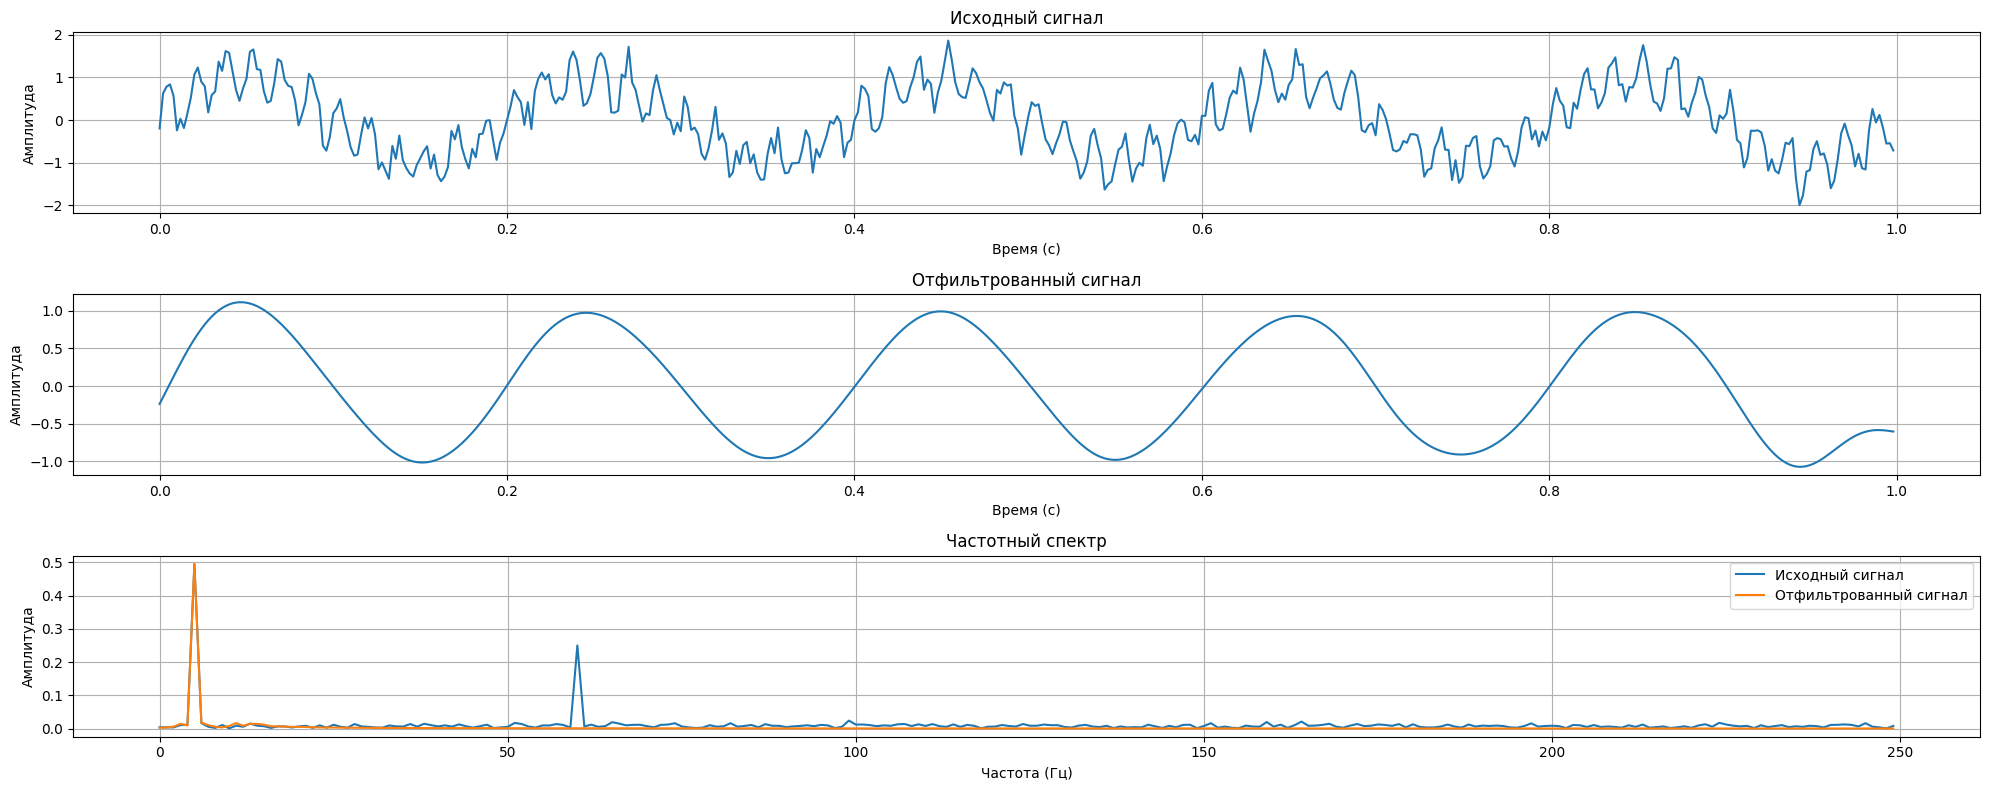

In [36]:
from scipy.signal import butter, filtfilt

low_freq = 5 
high_freq = 60 
noise_amplitude = 0.2 

t = np.linspace(0, 1, fs, endpoint=False)

signal = np.sin(2 * np.pi * low_freq * t) + 0.5 * np.sin(2 * np.pi * high_freq * t)
signal += noise_amplitude * np.random.randn(len(t))

def low_pass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

cutoff_frequency = 15  # Частота среза
filtered_signal = low_pass_filter(signal, cutoff_frequency, fs)

# Преобразование Фурье для исходного и отфильтрованного сигналов
fft_original = np.abs(fft(signal)) / len(signal)
fft_filtered = np.abs(fft(filtered_signal)) / len(signal)

# Визуализация во временной области
plt.figure(figsize=(20, 8))
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title("Исходный сигнал")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, filtered_signal)
plt.title("Отфильтрованный сигнал")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid()

# Визуализация спектра
plt.subplot(3, 1, 3)
plt.plot(freqs[:len(signal) // 2], fft_original[:len(signal) // 2], label="Исходный сигнал")
plt.plot(freqs[:len(signal) // 2], fft_filtered[:len(signal) // 2], label="Отфильтрованный сигнал")
plt.title("Частотный спектр")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()